In [1]:
#Importing libraries

from re import sub
from decimal import Decimal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Loading

In [2]:
def loadData(filepath):
    ''' loadData function will load csv data 
    files and return loaded data    '''
    
    data = pd.read_csv(filepath)
    return data
    
DF = loadData("car_insurance_claim.csv")
DF.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


# Data Preprocessing

Detect and Remove missing values 

In [3]:
# Detect Missing Values and print count 
# of missing values in columns of data
print(DF.isna().sum())

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64


In [4]:
#Remove missing values using dropna function

DF = DF.dropna(subset = ['INCOME'],
               how = 'any')
DF = DF.dropna(subset = ['HOME_VAL'],
               how = 'any')
DF = DF.dropna(subset = ['AGE'],
               how = 'any')

print("---  Removing Missing values  ---")
print(DF.isna().sum())

---  Removing Missing values  ---
ID              0
KIDSDRIV        0
BIRTH           0
AGE             0
HOMEKIDS        0
YOJ           488
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    584
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       563
CLAIM_FLAG      0
URBANICITY      0
dtype: int64


In [5]:
#Fill NAN Values by using mode of the column

DF['YOJ'].fillna(
    stats.mode(DF['YOJ'])[0][0],
    inplace = True)
DF['OCCUPATION'].fillna(
    stats.mode(DF['OCCUPATION'])[0][0],
    inplace = True)
DF['CAR_AGE'].fillna(
    stats.mode(DF['CAR_AGE'])[0][0],
    inplace = True)

print("---  Filling Nan Values  ---")
print(DF.isna().sum())

---  Filling Nan Values  ---
ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64


Format the data for Computations

In [6]:
def convertMoney(x):
    ''' Format the Money data into numeric values for computations
    like $67,349 to 67349 '''
    number = Decimal(sub(r'[^\d.]', '', x))
    return number

In [7]:
# Apply convertMoney function to all the columns having money data 

DF['INCOME_'] = DF['INCOME'].apply(lambda x: convertMoney(x))
DF['HOME_VAL_'] = DF['HOME_VAL'].apply(lambda x: convertMoney(x))
DF['BLUEBOOK_'] = DF['BLUEBOOK'].apply(lambda x: convertMoney(x))
DF['OLDCLAIM_'] = DF['OLDCLAIM'].apply(lambda x: convertMoney(x))
DF['CLM_AMT_'] = DF['CLM_AMT'].apply(lambda x: convertMoney(x))

# set datatype to float
DF['INCOME_'] = DF['INCOME_'].astype('float64')
DF['HOME_VAL_'] = DF['HOME_VAL_'].astype('float64')
DF['BLUEBOOK_'] = DF['BLUEBOOK_'].astype('float64')
DF['OLDCLAIM_'] = DF['OLDCLAIM_'].astype('float64')
DF['CLM_AMT_'] = DF['CLM_AMT_'].astype('float64')


In [8]:
# Drop old columns having unformatted data
DF = DF.drop(['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT'], axis = 1)
DF.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,...,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY,INCOME_,HOME_VAL_,BLUEBOOK_,OLDCLAIM_,CLM_AMT_
0,63581743,0,16MAR39,60.0,0,11.0,No,z_No,M,PhD,...,No,3,18.0,0,Highly Urban/ Urban,67349.0,0.0,14230.0,4461.0,0.0
1,132761049,0,21JAN56,43.0,0,11.0,No,z_No,M,z_High School,...,No,0,1.0,0,Highly Urban/ Urban,91449.0,257252.0,14940.0,0.0,0.0
2,921317019,0,18NOV51,48.0,0,11.0,No,z_No,M,Bachelors,...,No,2,10.0,0,Highly Urban/ Urban,52881.0,0.0,21970.0,0.0,0.0
3,727598473,0,05MAR64,35.0,1,10.0,No,Yes,z_F,z_High School,...,No,3,10.0,0,Highly Urban/ Urban,16039.0,124191.0,4010.0,38690.0,0.0
5,743146596,0,17MAY49,50.0,0,12.0,No,Yes,z_F,PhD,...,Yes,3,17.0,0,Highly Urban/ Urban,114986.0,243925.0,18000.0,19217.0,0.0


# Data Visualization

Car Details

In [9]:
# Details of car
car_data = DF[['CAR_TYPE', 'CAR_USE','URBANICITY','TRAVTIME','CAR_AGE']]
car_data.head()

,CAR_TYPE,CAR_USE,URBANICITY,TRAVTIME,CAR_AGE
0,Minivan,Private,Highly Urban/ Urban,14,18.0
1,Minivan,Commercial,Highly Urban/ Urban,22,1.0
2,Van,Private,Highly Urban/ Urban,26,10.0
3,z_SUV,Private,Highly Urban/ Urban,5,10.0
5,z_SUV,Private,Highly Urban/ Urban,36,17.0


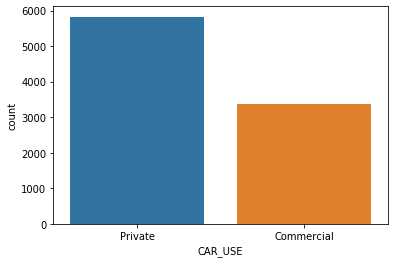

In [10]:
# Total insured cars used in commercial and private sectors
carUsagePlot = sns.countplot(data = DF, x = 'CAR_USE')

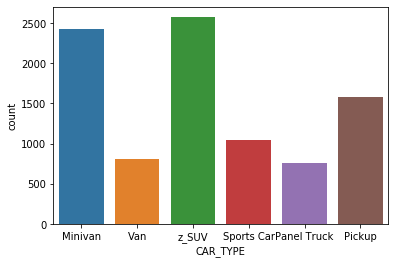

In [11]:
# Total Car Types claimed for insurance
carTypesPlot = sns.countplot(data = DF, x = 'CAR_TYPE')

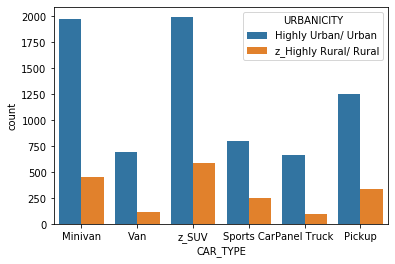

In [12]:
# Analyze Total cars used in Urban and Rural areas based on car type.

urbanicityPlot = sns.countplot(x="CAR_TYPE", hue="URBANICITY", data=DF)

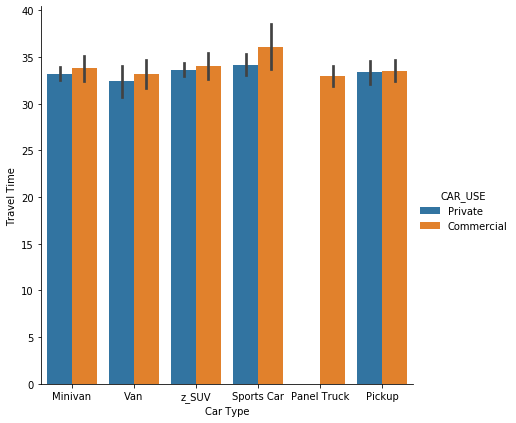

In [13]:
# Analyze Travel time of the various car types in the commercial and private sectors.

travelTimePlot = sns.catplot(data=DF, x='CAR_TYPE', y='TRAVTIME', hue='CAR_USE', kind='bar', height=6)
travelTimePlot.set_axis_labels("Car Type", "Travel Time")

CUSTOMER DETAILS

In [14]:
#Details of Customer
cust_data = DF[['EDUCATION','OCCUPATION','MSTATUS','PARENT1','GENDER','BIRTH','AGE','KIDSDRIV','HOMEKIDS','INCOME_','HOME_VAL_']]
cust_data.head()

,EDUCATION,OCCUPATION,MSTATUS,PARENT1,GENDER,BIRTH,AGE,KIDSDRIV,HOMEKIDS,INCOME_,HOME_VAL_
0,PhD,Professional,z_No,No,M,16MAR39,60.0,0,0,67349.0,0.0
1,z_High School,z_Blue Collar,z_No,No,M,21JAN56,43.0,0,0,91449.0,257252.0
2,Bachelors,Manager,z_No,No,M,18NOV51,48.0,0,0,52881.0,0.0
3,z_High School,Clerical,Yes,No,z_F,05MAR64,35.0,0,1,16039.0,124191.0
5,PhD,Doctor,Yes,No,z_F,17MAY49,50.0,0,0,114986.0,243925.0


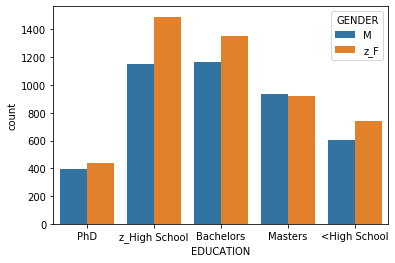

In [15]:
# Female customers are more educated 
EducationPlot = sns.countplot(x="EDUCATION", hue="GENDER" , data=DF)

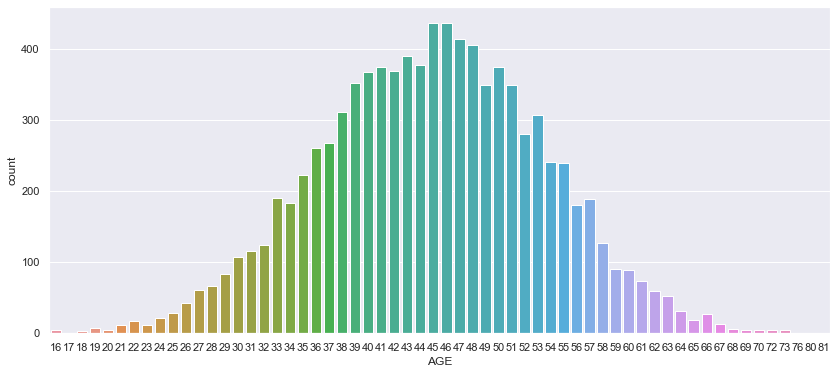

In [16]:
#define figure size
sns.set(rc={"figure.figsize":(14, 6)})

# convert age into int datatype from float
DF['AGE'] = DF['AGE'].astype('int64')

# Find out ages of customers
AgePlot = sns.countplot( data=DF , x='AGE')

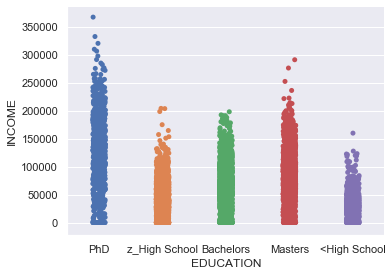

In [17]:
# Customer with higher education earning more income
CustIncomePlot = sns.catplot(data = DF,x = 'EDUCATION', y = 'INCOME_', height = 4, aspect=1.4)
CustIncomePlot.set_axis_labels("EDUCATION", "INCOME")

In [ ]:
# Male customers earn more incom than females
genderPlot = sns.catplot(data=DF, x='BIRTH', y='INCOME_', hue='GENDER',  kind='bar', height=4)
genderPlot.set_axis_labels("Gender", "Income")

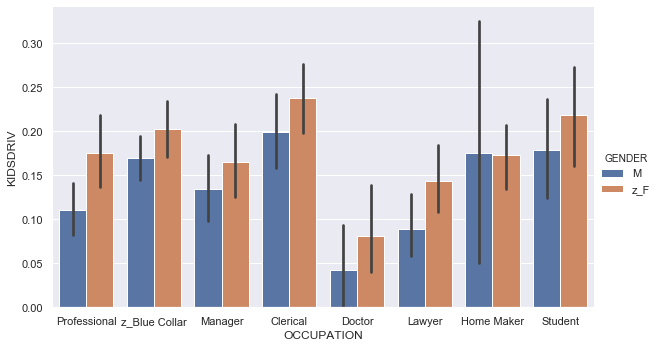

In [19]:
#  customer profession and gender with kids who drive the car  
CustOccPlot = sns.catplot(data = DF,x = 'OCCUPATION', y='KIDSDRIV', hue='GENDER',kind='bar',height=5, aspect=1.7)

In [20]:
#Details of Claims
claim_data = DF[['OLDCLAIM_','CLM_FREQ','CLM_AMT_','CLAIM_FLAG']]
claim_data.head()

,OLDCLAIM_,CLM_FREQ,CLM_AMT_,CLAIM_FLAG
0,4461.0,2,0.0,0
1,0.0,0,0.0,0
2,0.0,0,0.0,0
3,38690.0,2,0.0,0
5,19217.0,2,0.0,0


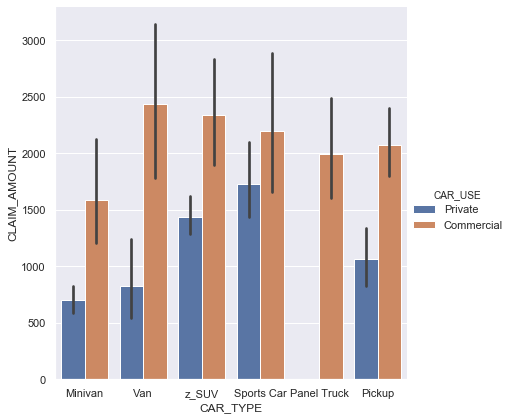

In [21]:
# Analyze insurance claim amount of the various car types in the commercial and private sectors.

carUseClaimPlot = sns.catplot(data=DF, x='CAR_TYPE', y='CLM_AMT_', hue='CAR_USE', kind='bar', height=6)
carUseClaimPlot.set_axis_labels("CAR_TYPE", "CLAIM_AMOUNT")

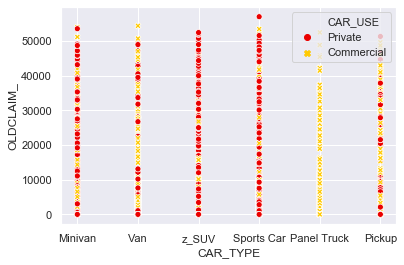

In [22]:
#define figure size
sns.set(rc={"figure.figsize":(6, 4)})

# Analyze insurance old claim amount of the various car types in the commercial and private sectors.
carUseClaimPlot = sns.scatterplot(data=DF, x='CAR_TYPE', y='OLDCLAIM_', palette="hot", hue="CAR_USE", style = "CAR_USE")


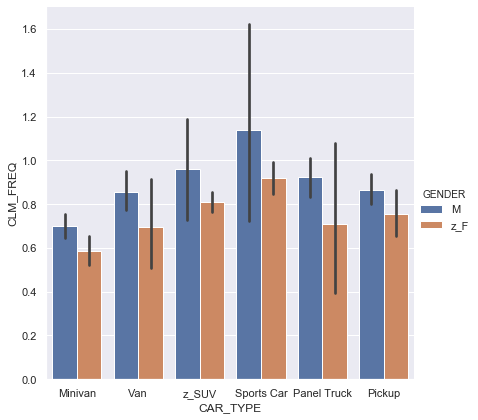

In [25]:
# Analyze insurance claim frequency of the various car types 
carUseClaimPlot = sns.catplot(data=DF, x='CAR_TYPE', y='CLM_FREQ',hue='GENDER' ,kind='bar',height=6)